In [ ]:
!pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 651.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=ec1483a031f10a0d0e793126442cff5c1cd37165a1d440c61673f026f70cb91f
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [ ]:
import anvil.server
import anvil.mpl_util
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

class Demo:
  def __init__(self):
    self.available_datasets = ['campione','titanic']
    self.selected_dataset = None
    self.available_features = []
    self.available_features_for_view = []
    self.selected_target = None
    self.selected_feature = None
    self.df = None

  def reset(self):
    self.selected_dataset = None
    self.available_features = []
    self.available_features_for_view = []
    self.selected_target = None
    self.selected_feature = None
    self.df = None

  def __str__(self):
        properties = ", ".join([f"{key}: {value}\n" for key, value in self.__dict__.items()])
        return f"MyClass instance with properties: {properties}"

mydemo = Demo()

In [ ]:
print(mydemo)

MyClass instance with properties: available_datasets: ['campione', 'titanic']
, selected_dataset: titanic
, available_features: []
, available_features_for_view: []
, selected_target: None
, selected_feature: None
, df: None



In [ ]:
np.random.seed(1)
anvil.server.connect("XXX")
drive.mount('/content/gdrive', force_remount= True)

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER
Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/scope_edbt
%ls

/content/gdrive/MyDrive/scope_edbt
output.png  titanic.xlsx  Unknown.png


In [ ]:
@anvil.server.callable
def reset_demo():
  mydemo.reset()

@anvil.server.callable
def get_datasets():
  return mydemo.available_datasets

@anvil.server.callable
def set_dataset(dataset):
  mydemo.selected_dataset = dataset
  return None

@anvil.server.callable
def load_dataset():
  df=pd.read_excel('%s.xlsx' % mydemo.selected_dataset, sheet_name='Sheet2')
  np.random.seed(1)
  mydemo.df = df.sample(frac=1)
  mydemo.available_features = df.columns.tolist()
  mydemo.selected_target = mydemo.available_features[0]
  mydemo.available_features_for_view = list(set(mydemo.available_features)-set([mydemo.selected_target]))
  return None

@anvil.server.callable
def get_features():
  return mydemo.available_features

@anvil.server.callable
def set_target(target):
  mydemo.selected_target = target
  mydemo.available_features_for_view = list(set(mydemo.available_features)-set([target]))

@anvil.server.callable
def get_features_for_view():
  return mydemo.available_features_for_view

@anvil.server.callable
def set_feature(feature):
  mydemo.selected_feature = feature

@anvil.server.callable
def get_plot():
    plt.clf()
    sns.countplot(mydemo.df, x=mydemo.df[mydemo.selected_feature], hue=mydemo.selected_target)
    return anvil.mpl_util.plot_image()

BlobMedia[image/png,11985 bytes,name=plot.png]

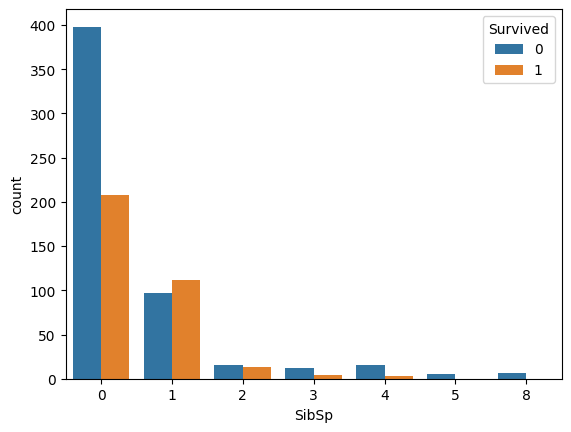

In [ ]:
#main
mydemo.reset()
set_dataset('titanic')
load_dataset()
set_target('Survived')
set_feature('SibSp')
get_plot()

KeyboardInterrupt: 

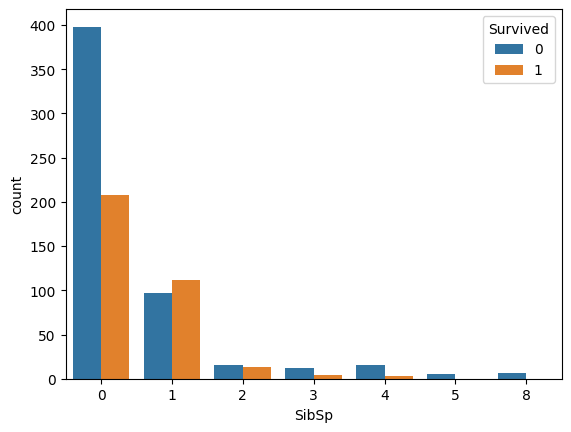

In [ ]:
anvil.server.wait_forever()